### Examples Paper 2 - James Lloyd

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io.wavfile
import urllib

from IPython.display import Audio
import pytest

# Question 1

(a) 
Linear Search for $ m = 10^3 $ and $ m = 10^4 $ 

Binary Search for $ m = 3\times10^5 $ and $ m = 5\times10^5 $ 



(b)
Linear search time = binary search time
$$ m10^{-8}n = 2\times10^{-5}nlog(n) + m10^{-6}log(n) $$
$$n = 26\times10^{6}$$

Equating two together and rearranging gives following code

In [3]:
n = 26*10**6
m = (2*10**(-5)*n*np.log(n))/(10**(-8)*n - 10**(-6)*np.log(n))
print(np.ceil(m))


34150.0


(b)
Linear search time = binary search time
$$ m10^{-8}n = 2\times10^{-5}nlog(n) + m10^{-6}log(n) $$
$$n = 26\times10^{6}$$
$$m = 34149$$

# Question 2

(a)

Fast

A and B are np.arrays/np.matrices.

Matrices are square and same shape

Check outputs are floats


Slow

A+B is a symmetric matrix

Check inputs are floats or ints

In [4]:
def evals(A,B):
    return np.linalg.eigvalsh(A+B)

A = np.array([[1,1,1],[1,1,1],[1,1,1]])
B = np.array([[3,4,3],[4,8,5],[3,5,3]])




def test_evals():
    C = evals(A,B)
    #Check A and B are both np.arrays/np.matrices
    assert type(A)==type(B)
    #Check that one matrix is square
    assert A.shape[0] == A.shape[1]
    #Check both matrices have the same shape
    assert A.shape == B.shape
    #Check array values are floats or ints
    for i in len(A):
        for j in len(A):
            assert (type(A[i][j]) == float or type(A[i][j]) == int) and (type(B[i][j]) == float or type(B[i][j]) == int)
    
    #Check product of A and B is symmetric
    for r in range(len(A)):
        for c in range(len(A)):
            if c != r:
                assert A[r][c] + B[r][c] == A[c][r] + B[c][r]
    #Check C is an array
    assert type(C) == np.ndarray
    #Check output values are floats
    for i in len(C[0]):
        assert tpye(C[0][i]) == float
    


# Question 3


(a)

$$
\frac{df}{dx} = \frac{f(x+h) - f(x)}{h} = \frac{f(x) + hf'(x) + 0.5h^2f''(x) + O(h^3)}{h} 
$$

$$
\frac{df}{dx} = O(h)
$$

(b)

$$
\frac{df}{dx} = \frac{f(x+h) - f(x-h)}{2h} = \frac{(f(x) + hf'(x) + 0.5h^2f''(x) + O(h^3))-(f(x) - hf'(x) + 0.5h^2f''(x) + O(h^3))}{2h} 
$$

$$
\frac{df}{dx} = \frac{2hf'(x) + O(h^3)}{2h} = O(h^2)
$$



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in double_scalars


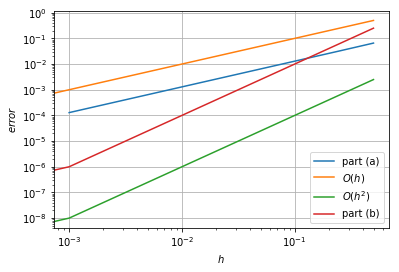

In [5]:
#Create a random function
def randf(x,h):
    randfunc = (x+h)**3 - 7*(x+h)**2 + 19*(x+h) + 5
    return randfunc

#Exact differential of function
def df_by_dx(x):
    randdf_by_dx = 3*x**2 - 14*x + 19
    return randdf_by_dx

#Create list of small numbers h
h = np.arange(0, 0.5, 0.001)

#Function to output result of one-sided difference equation
def one_side_diff(x,h):
    value = (randf(x,h)-randf(x,0))/h
    return value

#Function to output result of symmetric difference equation
def symm_diff(x,h):
    value = (randf(x,h)-randf(x,-h))/2*h
    return value

#List to add error values for part (a)
error_a = []

#List to add error values for part (b)
error_b = []

#Random number to find/estimate derivative at
number = 10

#For function to find error values for part (a)
for i in range(len(h)):
    error = (df_by_dx(number) - one_side_diff(number,h[i]))/df_by_dx(number)
    error_a.append(abs(error))
    
#Plot function of error in part (a) against value of h, should be of order O(h) (linear)

plt.loglog(h,error_a, label='part (a)')
plt.xlabel('$h$')
plt.ylabel('$error$')
plt.loglog(h, h, label='$O(h)$')
plt.loglog(h, 1e-2*h**2, label='$O(h^2)$')

#For function to find error values for part (b)
for i in range(len(h)):
    error = (df_by_dx(number) - symm_diff(number,h[i]))/df_by_dx(number)-1
    error_b.append(abs(error))

h_squared = []

#Square all values of h
for i in range(len(h)):
    h_squared.append(h[i]**2)
    
#Plot function of error in part (a) against value of h**2, should be of order O(h**2) (linear)
plt.loglog(h,error_b, label='part (b)')
plt.legend(loc=0)
plt.grid()
plt.show()



# Question 4

(a)

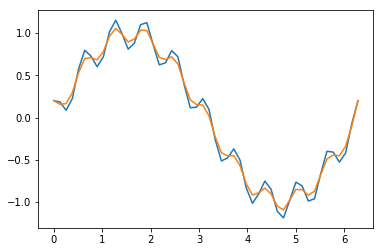

In [6]:
#Create function that creates a three-point average for an array of numbers
def tpa(x):
    tpa=[]
    tpa.append(x[0])
    for i in range(len(x)-2):
        tpa.append((x[i]+x[i+1]+x[i+2])/3)
    tpa.append(x[len(x)-1])
    return tpa

#Create function that creates array of values of f(x)
def func(x):
    function = []
    for i in range(len(x)):
        function.append(np.sin(x[i]) + np.cos(10*x[i])/5)
    return function
                 
#Create array of 50 points between 0 and 2 pie
points = np.linspace(0, 2*np.pi, num=50)

#Create array of function points
func_points = func(points)

#Create array of three-point average points
tpa_points = tpa(func_points)

#plot graphs
plt.plot(points, func_points, label="$\function$")
plt.plot(points, tpa_points, label="$\three-point average$")
plt.show()



(b)(i)

<class 'numpy.ndarray'>
Image array shape (pixels): (250, 359)


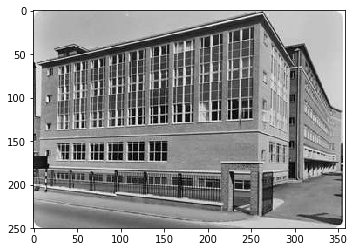

In [7]:
B = plt.imread("https://github.com/CambridgeEngineering/PartIA-Computing-Examples-Papers/raw/master/images/southwing.png")
print(type(B))
plt.imshow(B, cmap='gray');
print("Image array shape (pixels): {}".format(B.shape))


K = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])


def extend_matrix(C):
    #Columns in C
    n = len(C[0])
    #Rows in C
    m = len(C)

    #Add extra rows
    row_0 = np.zeros(shape=(1,n))
    row_n = np.zeros(shape=(1,n))
    
    #Equate extra rows to first and last on input matrix
    for x in range(n):
        row_0[0][x] = C[0][x]
        row_n[0][x] = C[m-1][x]
    
    #append extra rows to original matrix
    D = np.append(row_0, C, axis=0)
    A = np.append(D, row_n, axis=0)
    
    #Columns in A
    n = len(A[0])
    #Rows in A
    m = len(A)
    B = np.zeros(shape=(m,n))
    
    #Add extra columns
    column_0 = np.zeros(shape=(m,1))
    column_n = np.zeros(shape=(m,1))
    
    #Equate extra colums to the first and last on input matrix
    for x in range(m):
        column_0[x] = A[x][0]
        column_n[x] = A[x][n-1]
    
    #append extra columns to 'growing' matrix
    B = np.append(column_0, A, axis=1)
    E = np.append(B, column_n, axis=1)
    
    return E


def matrix_convolution(f,A,G):
    #Columns in A
    n = len(A[0])
    #Rows in A
    m = len(A)
    
    #Set up variable for formula
    d = int(len(G)/2)
    
    #Create array same size as image array
    B = np.zeros(shape=(m,n))
    
    #Extend the sides of A
    A = f(A)
    
    #Summation formula for matrix convolution
    for i in range(m):
        for j in range(n):
            sum = 0
            for k in range(len(G)):
                for l in range(len(G)):
                    #(i+1) as real image of A real array of A starts at A[1][1]
                    sum += G[k][l]*A[(i+1)-d+k][(j+1)-d+l]

            B[i][j] = sum
            
    return B

Image array shape (pixels): (250, 359)


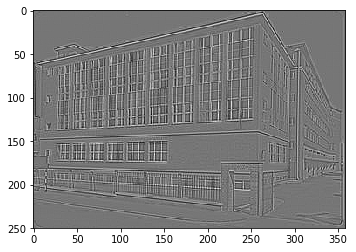

In [8]:
edge_detection = matrix_convolution(extend_matrix,B,K)

if (edge_detection==B).all():
    print('not working')
    

plt.imshow(edge_detection, cmap='gray');
print("Image array shape (pixels): {}".format(edge_detection.shape))

# Below images were for fun


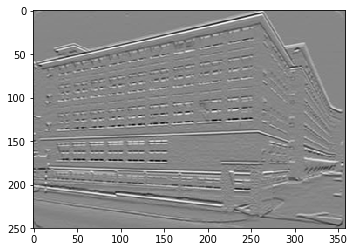

In [9]:


I = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

edge_2 = matrix_convolution(extend_matrix,B,I)


plt.imshow(edge_2, cmap='gray');


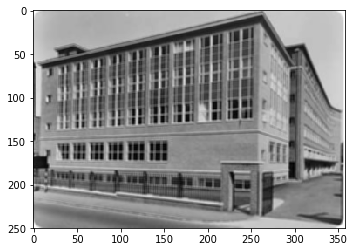

In [10]:
I = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

blur = matrix_convolution(extend_matrix,B,I)


plt.imshow(blur, cmap='gray');



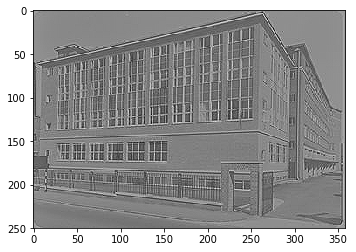

In [11]:
I = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

sharpen = matrix_convolution(extend_matrix,B,I)


plt.imshow(sharpen, cmap='gray');



(b)(ii)

Complexity is $ O(pq) $ as you have to do a summation of matrix convolution per pixel in the image.

# Question 5


In [15]:
#url = "https://universityofcambridgecloud-my.sharepoint.com/:u:/r/personal/tb267_cam_ac_uk/Documents/Students%202018-2019/General%20Resources/sample.wav?csf=1&e=fYOAZl"
#Audio(url)

import os

f = open(os.path.expanduser("~/Desktop/sample.wav"))

# Fetch sound file
#local_filename, headers = urllib.request.urlretrieve(url)
local_filename = f
# Read frequency and data array for sound track
fs, x = scipy.io.wavfile.read(local_filename) 

# If we have a stero track (left and right channels), take just the first channel
if len(x.shape) > 1:
    x = x[:, 0]

# Check that it plays
Audio(x, rate=fs)

FileNotFoundError: [Errno 2] No such file or directory: '/home/nbuser/Desktop/sample.wav'

In [ ]:
# Time points (0 to T, with T*fs points)
t = np.linspace(0, len(x)/fs, len(x), endpoint=False)

# Plot signal
plt.plot(t, x)
plt.xlabel('time (seconds)')
plt.ylabel('signal');

In [ ]:
# Perform discrete Fourier transform (real signal)
xf = np.fft.rfft(x)

# Create frequency axis for plotting
freq = np.linspace(0.0, fs/2, len(xf))

plt.semilogy(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

In [ ]:
# Create copy og transformed signal
xf_filtered = xf.copy()

# Cut-off frequencies (Hz)
cutoff_freq_low = 200

cutoff_freq_high = 1800

# Cut-off indices in transform array
n_cut_low = int(2*cutoff_freq_low*len(xf_filtered)/fs)
n_cut_high = int(2*cutoff_freq_high*len(xf_filtered)/fs)

# Remove low and high frequencies
xf_filtered[:n_cut_low] = 0.0

xf_filtered[n_cut_high:] = 0.0

# Plot filtered transform 
plt.semilogy(freq, np.abs(xf_filtered))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

In [ ]:
# Perform inverse transform on filtered signal
x_filtered = np.fft.irfft(xf_filtered)*2

# Plot signal
plt.plot(t, x_filtered)
plt.xlabel('Time (seconds)')
plt.ylabel('signal');

In [ ]:
Audio(x_filtered, rate=fs)

# Question 6


(a)

In [ ]:
#Create function that computes root of equation dependent on one variable using Newton's method

def Newtons_1_var(f_dash,f_ddash,x0,tol):

    xn = x0 - f_dash(x0)/f_ddash(x0)
    it = 1
    while f_dash(xn)/f_dash(x0) > tol:
        
        xn = xn - f_dash(xn)/f_ddash(xn)
        it+=1
    return round(xn,3), it

#Derivative and Second Derivative of f(x) = x**2 + 7*x + 9

def f_dash_q(x):
    f = 2*x +7
    return f

def f_ddash_q(x):
    f = 2
    return f

x, it = Newtons_1_var(f_dash_q,f_ddash_q,1.1,10**(-9))

print("x that minimises f for quadratic function is {}, and took {} iteration(s) to find".format(x,it))

#Derivative and second derivative of f(x) = x**3 + x**2

def f_dash_c(x):
    f = 3*x**2+2*x
    return f

def f_ddash_c(x):
    f = 6*x+2
    return f

x, it = Newtons_1_var(f_dash_c,f_ddash_c,1.1,10**(-9))

print("x that minimises f for cubic function is {}, and took {} iteration(s) to find".format(x,it))


(b)

In [ ]:
#Create function to create array of derivatives

def g(x,a,b):
    df_dx0 = -2*(a-x[0][0])-4*b*x[0][0]*(x[1][0]-x[0][0]**2)
    df_dx1 = 2*b*(x[1][0]-x[0][0]**2)
    M = np.array([[df_dx0],[df_dx1]])
    return M

#Create function to create array of second derivatives


def J(x,a,b):
    d2f_dx02 = 2 - 4*b*x[1][0] + 12*b*x[0][0]**2
    d2f_dx0dx1 = -4*b*x[0][0]
    d2f_dx1dx0 = -4*b*x[0][0]
    d2f_dx12 = 2*b
    M = np.array([[d2f_dx02,d2f_dx0dx1],[d2f_dx1dx0,d2f_dx12]])
    return M
    
#Function to minimum values of a function dependent on many variables
#Receives arrays for the starting values of variables, derivatives and second derivatives

def Newtons_many_var(X,G,j,tol,A,B):
    #Initialise variable arrays
    xn = np.array([[0],[0]])
    xn_plus = np.array([[0],[0]])
    
    #Find gx0 mod for tolerance
    g_x_mod = np.sqrt(G(X,A,B)[0][0]**2+G(X,A,B)[1][0]**2)
    
    #First iteration using initial values
    for i in range(len(X)):
        xn[i][0] = X[i][0]-np.linalg.solve(j(X,A,B),G(X,A,B))[i][0]
        
    it = 1
    
    #Find gxn mod for tolerance
    g_xn_mod = np.sqrt(G(xn,A,B)[0][0]**2+G(xn,A,B)[1][0]**2)
    
    while g_xn_mod/g_x_mod > tol:
        #iterate as before until while condition is False
        for i in range(len(xn)):
            xn_plus[i][0] = xn[i][0]-np.linalg.solve(j(xn,A,B),G(xn,A,B))[i][0]
            
        xn[0][0] = xn_plus[0][0]
        xn[1][0] = xn_plus[1][0]
        g_xn_mod = np.sqrt(G(xn,A,B)[0][0]**2+G(xn,A,B)[1][0]**2)
        
        it += 1
    
    return xn, it




In [ ]:
a = 2
b= 100

initial = np.array([[1.1],[1.1]])

x, it = Newtons_many_var(initial,g,J,10**(-9),a,b)

print("Value of variable 1 that minimises f is {}, value of variable 2 that minimises f is {}".format(x[0][0],x[1][0]))
print("It took {} iteration(s) to find values.".format(it))

(c) Would expect to converge in one iteration when initial values are already the correct values.

(d) Test that f_dash(x0) and  g_x_mod are not equal to 0 (as could divide by 0).

# Question 7


In [ ]:
#Create class
class rosenbrock_function:
    #Create attributes
    def __init__(self,x0,x1,a,b):
        self.x0 = x0
        self.x1 = x1
        self.a = a
        self.b = b
        
    #Create method for producing np.array of derivatives 
    def g(self):
        df_dx0 = -2*(self.a-self.x0)-4*self.b*self.x0*(self.x1-self.x0**2)
        df_dx1 = 2*self.b*(self.x1-self.x0**2)
        M = np.array([[df_dx0],[df_dx1]])
        return M
    
    #Create method for producing np.array of all second derivatives
    def J(self):
        d2f_dx02 = 2 - 4*self.b*self.x1 + 12*self.b*self.x0**2
        d2f_dx0dx1 = -4*self.b*self.x0
        d2f_dx1dx0 = -4*self.b*self.x0
        d2f_dx12 = 2*self.b
        M = np.array([[d2f_dx02,d2f_dx0dx1],[d2f_dx1dx0,d2f_dx12]])
        return M




def New_Newtons_many_var(z,tol,A,B):
    
    #Find gx0 mod for tolerance
    g_x_mod = np.sqrt(z.g()[0][0]**2+z.g()[1][0]**2)
    
    #Find new values of x0 and x1 after one iteration
    xn0 = z.x0-np.linalg.solve(z.J(),z.g())[0][0]
    xn1 = z.x1-np.linalg.solve(z.J(),z.g())[1][0]
    
    #Equate xn to class created to create new arrays of rosenbrock function
    xn = rosenbrock_function(xn0,xn1,A,B)
                                          
    it = 1
    
    #Find gxn mod for tolerance
    g_xn_mod = np.sqrt(xn.g()[0][0]**2 + xn.g()[1][0]**2)
    
    while g_xn_mod/g_x_mod > tol:
        
        #Find xn + 1 for both x0 and x1 as before until while condition is False
        xn_plus0 = xn.x0 - np.linalg.solve(xn.J(),xn.g())[0][0]
        xn_plus1 = xn.x1 - np.linalg.solve(xn.J(),xn.g())[1][0]
        
        #Equate back to terms of xn (under rosenbrok class)
        xn = rosenbrock_function(xn_plus0,xn_plus1,A,B)
        
        #Re-calculate gxn mod for tolerance
        g_xn_mod = np.sqrt(xn.g()[0][0]**2 + xn.g()[1][0]**2)
        
        
        it += 1
    
    return xn.x0, xn.x1, it


test = rosenbrock_function(1.1,1.1,2,100)

x0, x1, it = New_Newtons_many_var(test,10**(-9),test.a,test.b)

print("Value of variable 1 that minimises f is {} \nValue of variable 2 that minimises f is {}".format(round(x0,3),round(x1,3)))

print("It took {} iteration(s) to find values.".format(it))

# Question 8

(a) A dictionary of lists of tuples. 

In [ ]:
nodes = {} 
nodes["town 0"] = [("town 2", 3),  
                   ("town 3", 8)]

nodes["town 1"] = [("town 2", 2),  
                   ("town 4", 14), 
                   ("town 5", 14)]

nodes["town 2"] = [("town 0", 3),  
                   ("town 1", 2),  
                   ("town 3", 4)]

nodes["town 3"] = [("town 0", 8),  
                   ("town 2", 4),  
                   ("town 4", 3)]

nodes["town 4"] = [("town 1", 14), 
                   ("town 3", 3)]

nodes["town 5"] = [("town 1", 14)]

(b) Town 0 -> Town 2 -> Town 1 -> Town 5 -$19km$

In [ ]:
def find_shortest_path(graph, current_node, target_node, route=[],
                       distance = 0.0, edge_length = 0.0):
    "Finds shortest path from current to target node, exhaustive search"
    
    # Add current node to end of route
    route = route + [current_node]

    # Add distance to route
    if len(route) > 1: # skip on top-level call
        distance = distance + edge_length
        
    # If we have reached the target, return
    if current_node == target_node:
        return route, distance
        
    # Handle case that the current node is not in the graph
    if current_node not in graph:
        return None
    
    # No route stored yet
    shortest_path = None
    
    # Loop over edges connected to the current node
    for edge in graph[current_node]:
    
        town = edge[0]
        edge_length = edge[1]
        
        # Check that node is not already in the route
        if town not in route:

            # Look for shortest path from this town to the end node    
            new_path = find_shortest_path(graph, town, target_node,
                                          route, distance, edge_length)           
            if new_path:
                if not shortest_path or new_path[1] < shortest_path[1]:
                    shortest_path = new_path

    return shortest_path

# Test between towns 0 and 5
shortest_path = find_shortest_path(nodes, "town 0", "town 5")
print(shortest_path)